In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 10000
G

<disgten.Generator with input: 
n_particle: 10000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
G.run()
G.particles

<ParticleGroup with 10000 particles at 0x7fe905fba290>

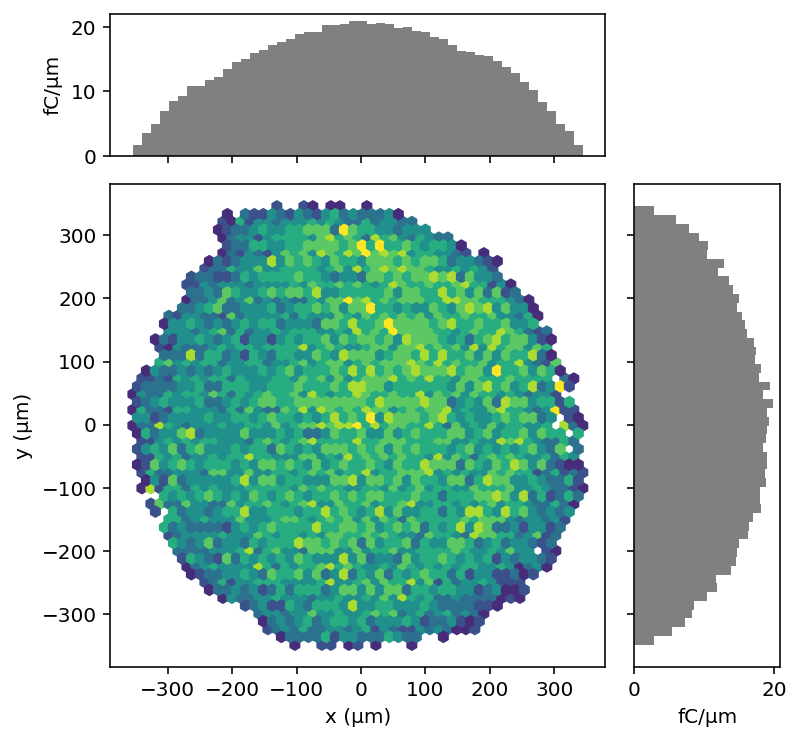

In [5]:
G.particles.plot('x', 'y', bins=50)

In [6]:
G.particles.write_astra('astra.particles')

In [7]:
from astra import Astra

In [8]:
A = Astra('astra.in', initial_particles=G.particles)

In [9]:
# Turn space charge off
A.input['charge']['lspch'] = False 
A.verbose=False

In [10]:
A.run()

In [11]:
A.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

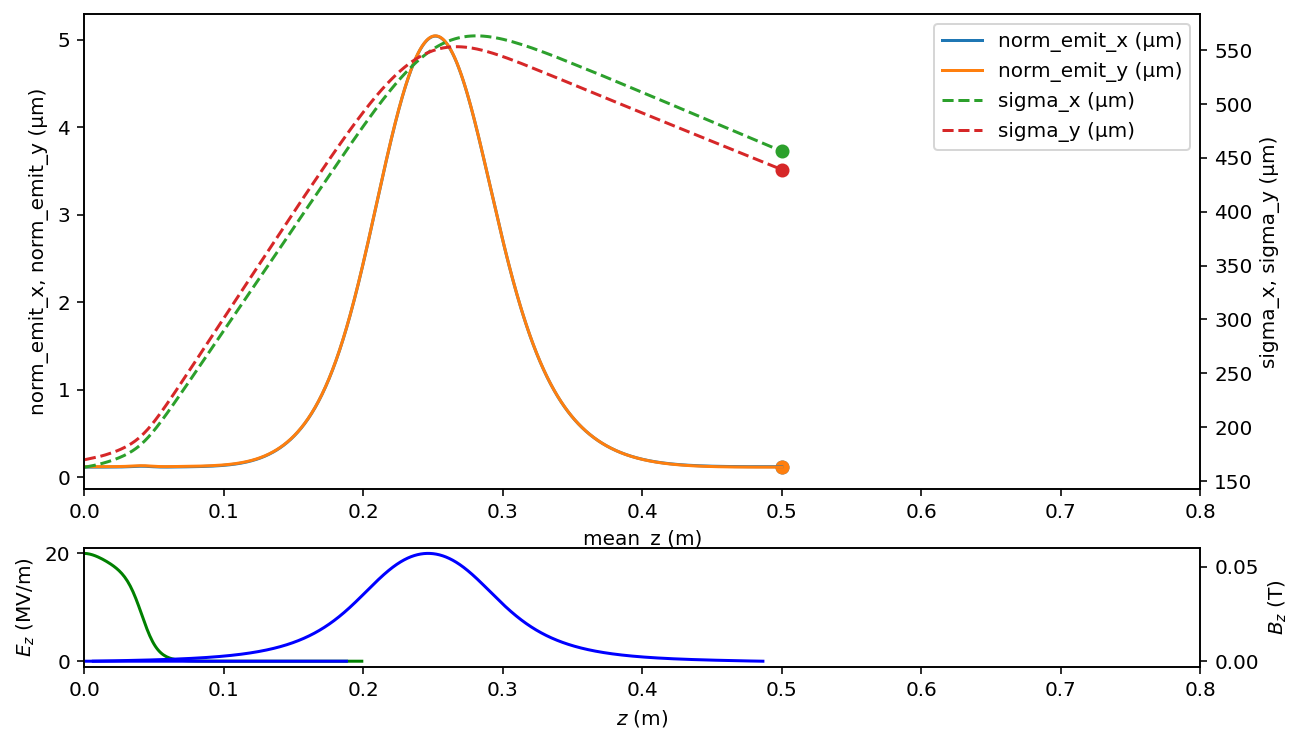

In [12]:
A.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(0,0.8), figsize=(10,6))

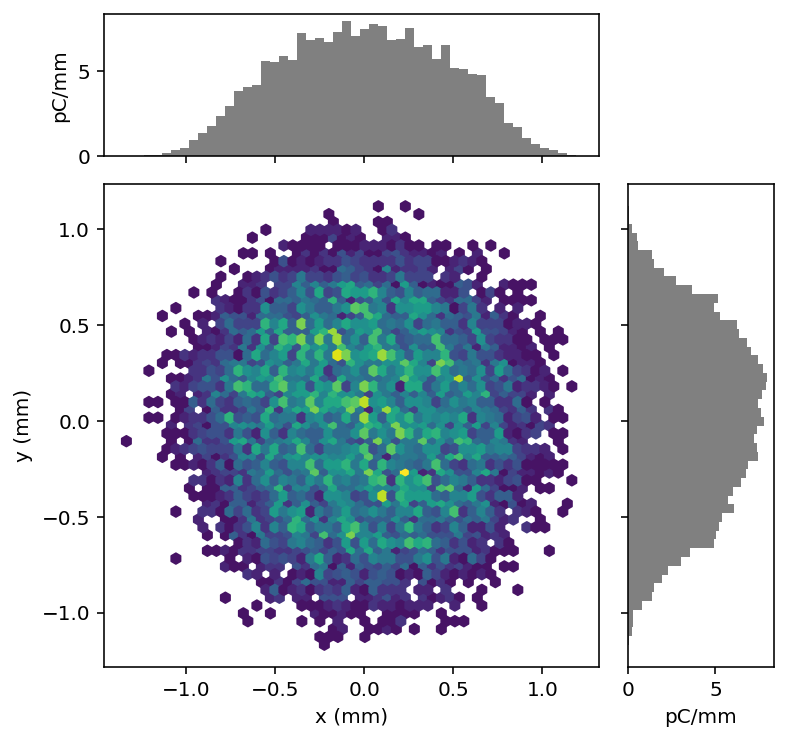

In [13]:
A.particles[-1].plot('x', 'y', bins=50)

In [17]:
A.archive()

'astra_2ee29c8e37a19f972f154e5a4d8d916c.h5'

In [15]:
!rm *h5

In [16]:
!pwd

/Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun
